
DESAFIO 5

Etapa 1



In [2]:
!pip install sidetable
!pip install pydantic<2
!pip install pydantic-settings
!pip install pandas-profiling
!pip install numba==0.58.1

#Instalação dos pacotes necessários

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00
/bin/bash: line 1: 2: No such file or directory
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3a5507a8c496ea85e7c0eaa8c7c2066ee7a7e5ff14b5a382a31f63052476604e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.2 MB/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import sidetable

#Importação dos pacotes julgados necessários (nem todos foram utilizados)

In [4]:
path = '/content/drive/MyDrive/Análise de Dados/Estudo/DNC/Desafio 5/data.csv'
df = pd.read_csv(path, encoding='unicode_escape')
df.head()

#Abrindo o arquivo .csv como um dataframe dentro do Python

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Etapa 2

In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df = df.drop(columns='Description').dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Quantity     406829 non-null  int64  
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.8+ MB


Etapa 3

In [10]:
filtro1 = df['UnitPrice'].isnull() | (df['UnitPrice'] > 0)

df = df[filtro1]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406789 non-null  object 
 1   StockCode    406789 non-null  object 
 2   Quantity     406789 non-null  int64  
 3   InvoiceDate  406789 non-null  object 
 4   UnitPrice    406789 non-null  float64
 5   CustomerID   406789 non-null  float64
 6   Country      406789 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [11]:
filtro2 = df['UnitPrice'].isnull() | (df['Quantity'] > 0)

df = df[filtro2]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Quantity     397884 non-null  int64  
 3   InvoiceDate  397884 non-null  object 
 4   UnitPrice    397884 non-null  float64
 5   CustomerID   397884 non-null  float64
 6   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.3+ MB


Etapa 4

In [12]:
df.duplicated().sum()

5194

In [13]:
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392690 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392690 non-null  object 
 1   StockCode    392690 non-null  object 
 2   Quantity     392690 non-null  int64  
 3   InvoiceDate  392690 non-null  object 
 4   UnitPrice    392690 non-null  float64
 5   CustomerID   392690 non-null  float64
 6   Country      392690 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.0+ MB


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['CustomerID'] = df['CustomerID'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392690 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392690 non-null  object        
 1   StockCode    392690 non-null  object        
 2   Quantity     392690 non-null  int64         
 3   InvoiceDate  392690 non-null  datetime64[ns]
 4   UnitPrice    392690 non-null  float64       
 5   CustomerID   392690 non-null  object        
 6   Country      392690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.0+ MB


Etapa 6

In [15]:
filtro3 = df['UnitPrice'] > 5000 & (df['Quantity'] > 10000)

df = df[filtro3]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392690 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392690 non-null  object        
 1   StockCode    392690 non-null  object        
 2   Quantity     392690 non-null  int64         
 3   InvoiceDate  392690 non-null  datetime64[ns]
 4   UnitPrice    392690 non-null  float64       
 5   CustomerID   392690 non-null  object        
 6   Country      392690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.0+ MB


Etapa 7

In [16]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Etapa 8

In [17]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Etapa 9

In [18]:
df_countries = df.groupby('Country').agg('Revenue').sum().reset_index()
dfsort = df_countries.sort_values(by='Revenue', ascending=False)
top_n = 10
df_top = dfsort.head(top_n)

df_top.head()

,Country,Revenue
35,United Kingdom,7284472.794
23,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310


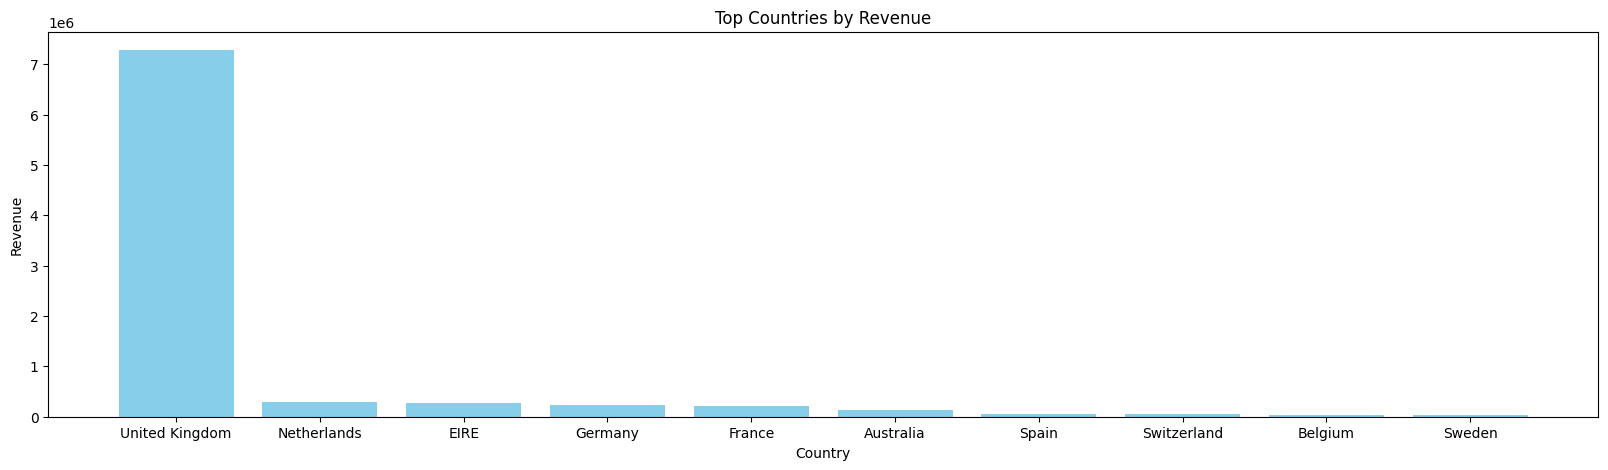

In [19]:
plt.figure(figsize=(20, 5))
plt.bar(df_top['Country'], df_top['Revenue'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top Countries by Revenue')
plt.show()

In [20]:
df_products = df.groupby('StockCode').agg('Quantity').sum().reset_index()
product_sort = df_products.sort_values(by='Quantity', ascending=False)
top_n = 10
product_sort_top = product_sort.head(top_n)

product_sort_top.head()

,StockCode,Quantity
2399,23843,80995
1997,23166,77916
2804,84077,54319
1088,22197,49160
3219,85099B,46078


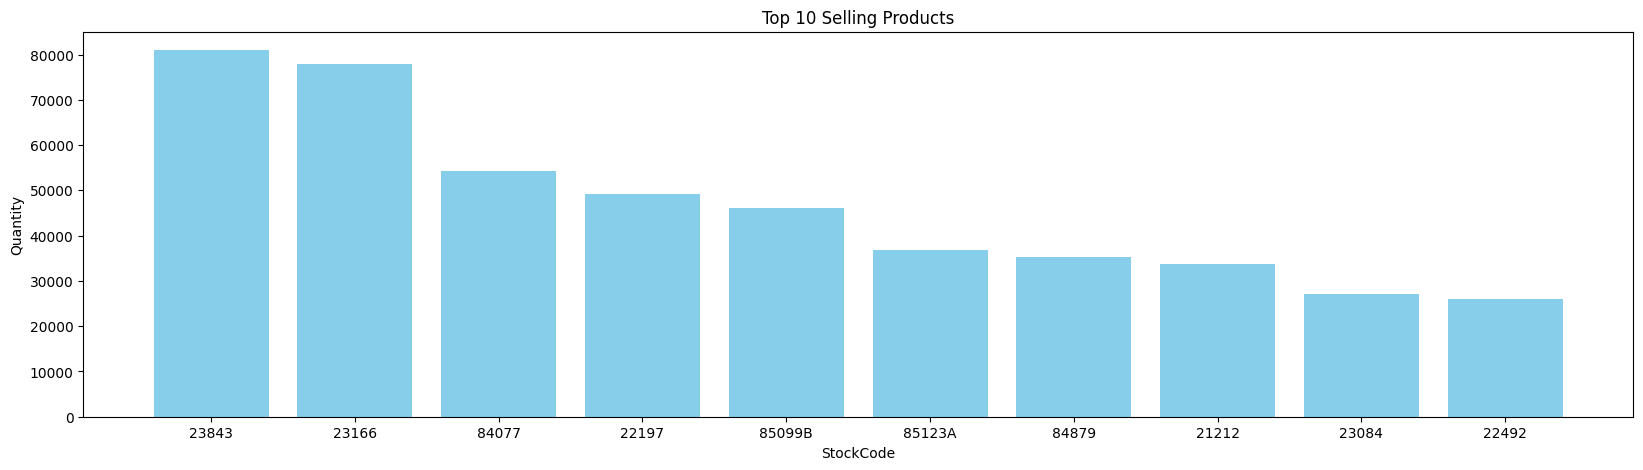

In [99]:
plt.figure(figsize=(20, 5))
plt.bar(product_sort_top['StockCode'], product_sort_top['Quantity'], color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.title('Top 10 Selling Products')
plt.show()

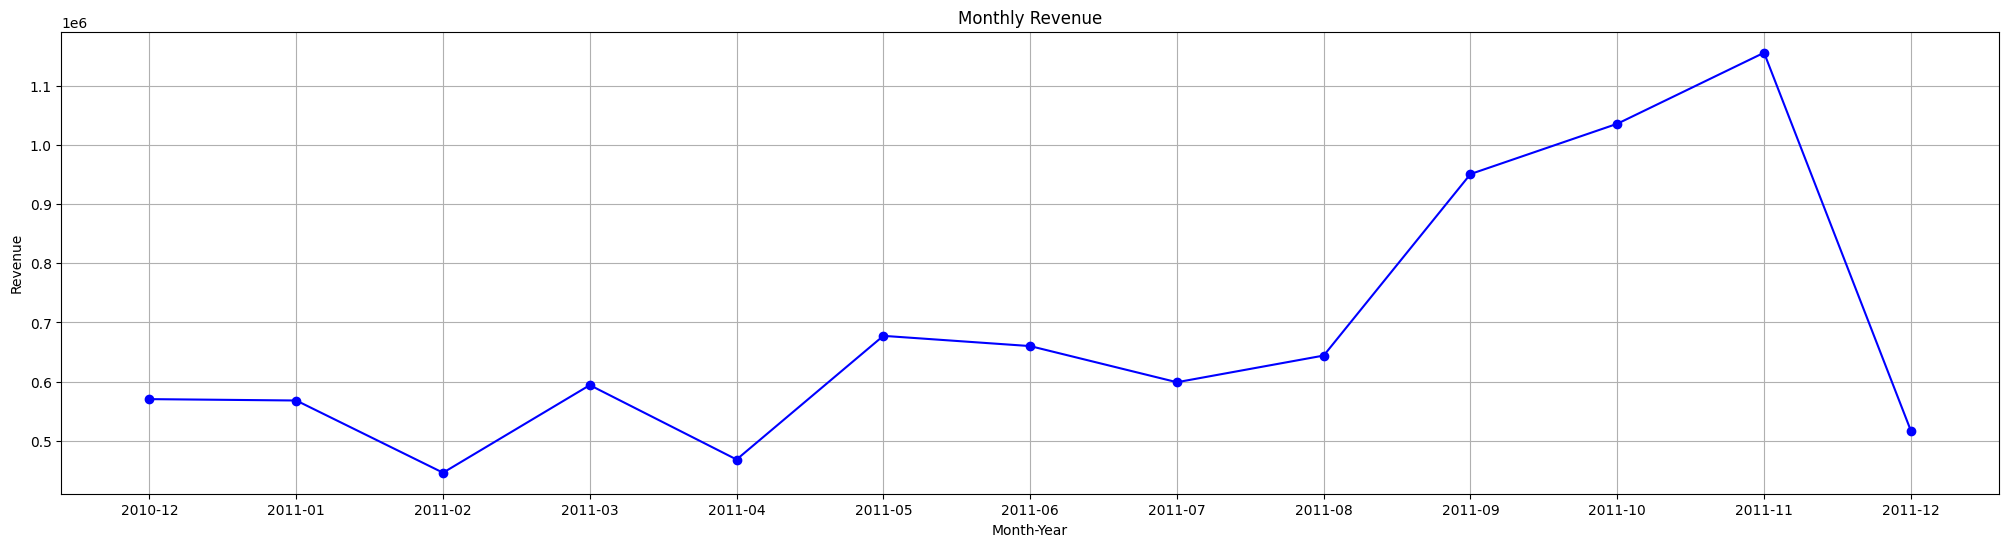

In [111]:
df_monthly = df.groupby(df['InvoiceDate'].dt.to_period('M')).agg('Revenue').sum().reset_index().sort_values(by='InvoiceDate', ascending=True)

plt.figure(figsize=(25, 6))
plt.plot(df_monthly['InvoiceDate'].astype(str), df_monthly['Revenue'], marker='o', linestyle='-', color='b')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.grid(True)
plt.show()

In [23]:
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
df_monthly_country = df.groupby(['MonthYear','Country'])['Revenue'].sum().reset_index().sort_values(by='MonthYear', ascending=True)
df_monthly_country.head(25)

,MonthYear,Country,Revenue
0,2010-12,Australia,965.35
21,2010-12,United Kingdom,496477.34
20,2010-12,Switzerland,1304.92
19,2010-12,Sweden,3834.30
18,2010-12,Spain,1843.73
17,2010-12,Portugal,2439.97
16,2010-12,Poland,248.16
14,2010-12,Netherlands,8784.48
13,2010-12,Lithuania,1661.06
12,2010-12,Japan,7705.07


In [33]:
df_filtered = df_monthly_country[df_monthly_country['Country'].isin(df_top['Country'])]
df_filtered.head(10)

,MonthYear,Country,Revenue
0,2010-12,Australia,965.35
21,2010-12,United Kingdom,496477.34
20,2010-12,Switzerland,1304.92
19,2010-12,Sweden,3834.30
18,2010-12,Spain,1843.73
14,2010-12,Netherlands,8784.48
9,2010-12,Germany,15205.74
2,2010-12,Belgium,1809.91
6,2010-12,EIRE,8813.88
8,2010-12,France,9616.31


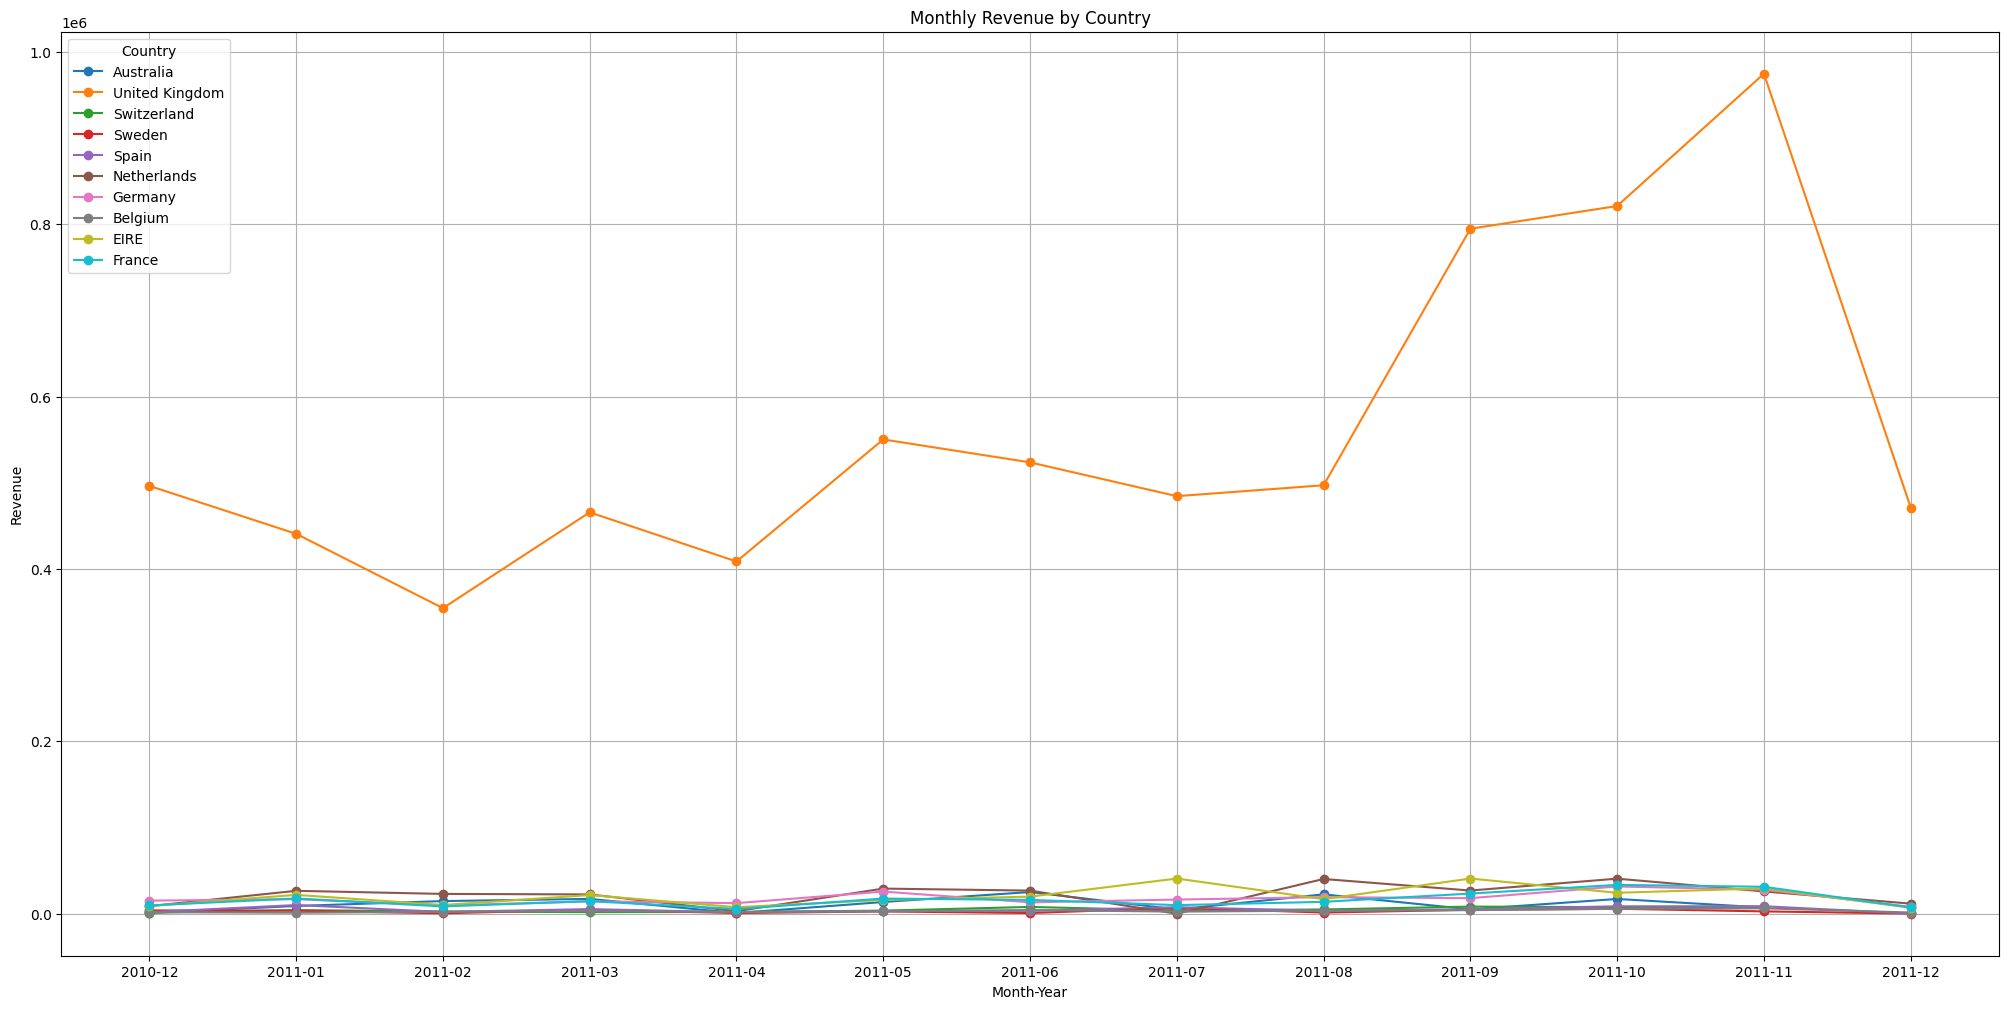

In [34]:
plt.figure(figsize=(25, 12))

for country in df_filtered['Country'].unique():
  df_country = df_filtered[df_filtered['Country'] == country]
  plt.plot(df_country['MonthYear'].astype(str), df_country['Revenue'], marker='o', linestyle='-', label=country)

plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.title('Monthly Revenue by Country')
plt.legend(title='Country')
plt.grid(True)
plt.show()

Etapa 10

In [53]:
df_orders = df.groupby(['InvoiceNo','CustomerID','MonthYear'])['Revenue'].sum().reset_index()

df_orders.head()

,InvoiceNo,CustomerID,MonthYear,Revenue
0,536365,17850.0,2010-12,139.12
1,536366,17850.0,2010-12,22.20
2,536367,13047.0,2010-12,278.73
3,536368,13047.0,2010-12,70.05
4,536369,13047.0,2010-12,17.85


In [57]:
df_client = df_orders.groupby(['CustomerID', 'MonthYear'])['Revenue'].sum().reset_index()
df_client['LastPurchase'] = df_client.groupby('CustomerID')['MonthYear'].transform('max')
df_client = df_client.drop(columns='MonthYear')
df_client['Frequency'] = df_client.groupby('CustomerID')['CustomerID'].transform('count')
df_client = df_client.groupby(['CustomerID', 'LastPurchase', 'Frequency'])['Revenue'].sum().reset_index()

df_client.head(15)

,CustomerID,LastPurchase,Frequency,Revenue
0,12346.0,2011-01,1,77183.60
1,12347.0,2011-12,7,4310.00
2,12348.0,2011-09,4,1797.24
3,12349.0,2011-11,1,1757.55
4,12350.0,2011-02,1,334.40
5,12352.0,2011-11,4,2506.04
6,12353.0,2011-05,1,89.00
7,12354.0,2011-04,1,1079.40
8,12355.0,2011-05,1,459.40
9,12356.0,2011-11,3,2811.43


In [59]:
df_client['Recency'] = df['InvoiceDate'].max() - df_client['LastPurchase'].dt.to_timestamp()
df_client['Recency'] = df_client['Recency'].dt.days

df_client.head()

,CustomerID,LastPurchase,Frequency,Revenue,Recency
0,12346.0,2011-01,1,77183.60,342
1,12347.0,2011-12,7,4310.00,8
2,12348.0,2011-09,4,1797.24,99
3,12349.0,2011-11,1,1757.55,38
4,12350.0,2011-02,1,334.40,311


In [42]:
df_client['Frequency'] = df_client.groupby('CustomerID')['CustomerID'].transform('count')

df_client.head()

,CustomerID,MonthYear,Revenue,Recency,Frequency
0,12346.0,2011-01,77183.60,342,1
1,12347.0,2010-12,711.79,373,7
2,12347.0,2011-01,475.39,342,7
3,12347.0,2011-04,636.25,252,7
4,12347.0,2011-06,382.52,191,7


In [60]:
df_client['TicketMedio'] = df_client['Revenue'] / df_client['Frequency']

df_client.head()


,CustomerID,LastPurchase,Frequency,Revenue,Recency,TicketMedio
0,12346.0,2011-01,1,77183.60,342,77183.600000
1,12347.0,2011-12,7,4310.00,8,615.714286
2,12348.0,2011-09,4,1797.24,99,449.310000
3,12349.0,2011-11,1,1757.55,38,1757.550000
4,12350.0,2011-02,1,334.40,311,334.400000
